In [1]:
##importing modules

import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
## Creating random values in [0,1]

random.seed(98103)
n = 30
x = pd.Series(np.array(([random.random() for i in range(n)]))).sort_values().reset_index().drop('index',axis=1)
y = x.apply(lambda x : np.sin(4*x))

In [3]:
## Creating noise

random.seed(1)
noise = pd.Series(np.array(([random.gauss(0,1.0/3.0) for i in range(n)])))


In [4]:
## Adding noise to the original sin

y = pd.Series(y.iloc[:,0])
y+=noise

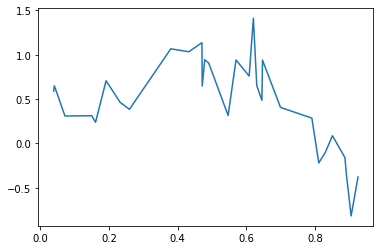

In [5]:
plt.plot(x,y)
x= pd.Series(x.iloc[:,0])

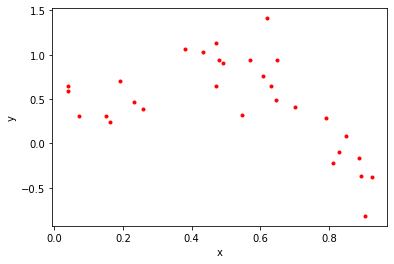

In [6]:
data = pd.DataFrame({'X1':np.array(x),'Y':np.array(y)})
## Plotting data
def plotData(data):
    _ = plt.plot(data.iloc[:,0],data.iloc[:,1],'.r')
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')
    plt.show()
plotData(data)

In [7]:
## Extending out dataframe to higer order

def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x : x**power)
    return poly_dataframe

In [49]:
def polynomial_regression(data,deg):
    model = LinearRegression()
    model.fit(data.iloc[:,:deg],y)
    return model
def ridge_regression(data,deg):
    model = Lasso(alpha = .001)
    model.fit(data.iloc[:,:deg],y)
    return model    

In [9]:
data2 = polynomial_dataframe(data.iloc[:,0],15)

def printCoef(model):
    deg = len(model.coef_)-1
    w = (list(model.coef_))
    w.append(model.intercept_)
    w.reverse
    print(np.poly1d(w))


In [50]:
model1 = polynomial_regression(data2,deg=15)
model2 = ridge_regression(data2,deg=15)
printCoef(model1)
printCoef(model2)


      15             14             13             12             11
1689 x  - 5.218e+04 x  + 9.062e+05 x  - 1.014e+07 x  + 7.818e+07 x 
              10            9             8             7            6
 - 4.302e+08 x  + 1.72e+09 x - 5.046e+09 x + 1.089e+10 x - 1.72e+10 x
              5             4             3            2
 + 1.961e+10 x - 1.569e+10 x + 8.346e+09 x - 2.65e+09 x + 3.796e+08 x - 21.99
       15     13         12         11     10     9     8     7
1.373 x  - 0 x  - 2.886 x  - 0.181 x  - 0 x  - 0 x - 0 x - 0 x + 0.3354


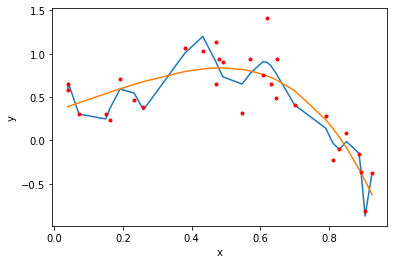

In [51]:
y_pred_of = model1.predict(data2.iloc[:,:15])
y_pred_reg = model2.predict(data2.iloc[:,:15])
plt.plot(x,y_pred_of)
plt.plot(x,y_pred_reg)
plotData(data)


In [248]:
((((1000000 -1)/1000000) )*(1000000-1)*100) / (3600*24*12*30)

3.21501414609375

## Cross-Validation

In [258]:
#loading data

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('Desktop/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [283]:
from sklearn import linear_model
l2_small_penalty = 1.23e2
poly15_data = polynomial_dataframe(set_1['sqft_living'], 15)
model1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model1.fit(poly15_data, set_1['price'])
model1.coef_

array([2.32806803e+00, 3.53621608e-04, 3.31969692e-08, 2.00082477e-12,
       1.11492559e-16, 6.57786122e-21, 4.12939525e-25, 2.70393755e-29,
       1.81614763e-33, 1.23824277e-37, 8.51872481e-42, 5.89455598e-46,
       4.09542560e-50, 2.85464889e-54, 1.99547476e-58])

In [267]:
set_1 = pd.read_csv('Desktop/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('Desktop/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('Desktop/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('Desktop/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [284]:
poly15_data2 = polynomial_dataframe(set_2['sqft_living'], 15)
model2 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model2.fit(poly15_data2, set_2['price'])
model2.coef_

array([2.09756903e+00, 3.90817483e-04, 6.67189944e-08, 8.90002997e-12,
       9.72639877e-16, 9.69733682e-20, 9.50564475e-24, 9.44491031e-28,
       9.57191338e-32, 9.86945155e-36, 1.03101115e-39, 1.08729784e-43,
       1.15453748e-47, 1.23211305e-51, 1.31986696e-55])

In [285]:
poly15_data3 = polynomial_dataframe(set_3['sqft_living'], 15)
model3 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model3.fit(poly15_data3, set_3['price'])
model3.coef_

array([2.28906258e+00, 4.12472190e-04, 6.08835345e-08, 6.58572163e-12,
       6.15278155e-16, 5.64446634e-20, 5.28834396e-24, 5.07091402e-28,
       4.94657273e-32, 4.88043809e-36, 4.85009106e-40, 4.84161534e-44,
       4.84635021e-48, 4.85883628e-52, 4.87558469e-56])

In [286]:
poly15_data4 = polynomial_dataframe(set_4['sqft_living'], 15)
model4 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model4.fit(poly15_data4, set_4['price'])
model4.coef_


array([2.08596194e+00, 4.05035772e-04, 7.46864647e-08, 1.13096608e-11,
       1.45864442e-15, 1.73561251e-19, 2.01609632e-23, 2.34605255e-27,
       2.75636073e-31, 3.27043069e-35, 3.91046855e-39, 4.70118041e-43,
       5.67212304e-47, 6.85958087e-51, 8.30843630e-55])

In [282]:
1.11944570e+03

1119.4457

In [281]:
-7.55395957e+02

-755.395957

In [287]:
2.08596194e+00

2.08596194

In [306]:
train_valid_shuffled = pd.read_csv('Desktop/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('Desktop/wk3_kc_house_test_data.csv', dtype=dtype_dict)
train_valid_shuffled = train_valid_shuffled[['sqft_living','price']]
test = test[['sqft_living','price']]

def computeRSS(y_true,y_pred):
    return np.sum((y_true-y_pred)**2)
train_valid_shuffled.head()

,sqft_living,price
0,2800.0,665000.0
1,2490.0,645000.0
2,2340.0,640000.0
3,1320.0,594000.0
4,1904.0,365000.0


In [304]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    (train_valid_shuffled.iloc[int(start):int(end)+1,3].head())
    (train_valid_shuffled.iloc[0:start,3].append(train_valid_shuffled.iloc[end+1:n,3]).head())
    (i, (start, end))

In [348]:
def k_fold_cross_validation(k, l2_penalty, data,output):
    n = len(data)
    val_error=[]
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        val_data = data.iloc[start:end+1,:]
        val_output = output[start:end+1]
        train_data = data.iloc[0:start,:].append(data.iloc[end+1:n,:])
        train_output = output[0:start].append(output[end+1:n])
        model = Ridge(l2_penalty,normalize=True)
        model.fit(train_data,train_output)
        val_error.append(computeRSS(val_output,model.predict(val_data)))
    np.array(val_error)
    return np.mean(val_error)

In [350]:
l2_penalties = np.logspace(3, 9, num=13)
data = polynomial_dataframe(train_valid_shuffled['sqft_living'],15)
errors = []
k_fold_cross_validation(10,1,data,train_valid_shuffled['price'])
for i in l2_penalties:
    err = k_fold_cross_validation(10,i,data,train_valid_shuffled['price'])
    errors.append(err)

In [358]:
ind=np.argsort(np.array(errors))[0]
l2_penalties[ind]

1000.0

In [360]:
data = polynomial_dataframe(test['sqft_living'],15)
model = Ridge(1000,normalize=True)
model.fit(data,test.iloc[:,-1])
computeRSS(test.iloc[:,-1],model.predict(data))

283265705430072.56

## Ridge Regression

In [12]:
train_data = pd.read_csv('Desktop/wk3_kc_house_train_data.csv')
test_data = pd.read_csv('Desktop/wk3_kc_house_test_data.csv')
#sales = pd.read_csv('Desktop/wk3_kc_house_data.csv')

In [6]:
def get_numpy_data(dataframe,features,output):
    feature_matrix = np.array(dataframe.drop(output,axis=1).loc[:,features])
    output = np.array(dataframe.loc[:,output])
    return(feature_matrix,output)

In [8]:
train_data.iloc[:3,:3]

,id,date,price
0,2487200875,20141209T000000,604000.0
1,7237550310,20140512T000000,1225000.0
2,9212900260,20140527T000000,468000.0


In [101]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant==True:
        derivative = 2*np.dot(errors, feature) 
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2*np.dot(errors, feature) + 2*l2_penalty*weight
    return derivative

In [126]:
## for data [m,n]  and  o/p [m,1] and weights [n+1,1] -> prediction is [m,1]
def predict_output(X,weights,bias):
    return np.dot(X.reshape(-1,1),weights.reshape(-1,1)) + bias

In [60]:
(example_features, example_output) = get_numpy_data(train_data, 'sqft_living', 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features, my_weights[1], 1, False))
print (np.sum(errors*example_features)*2+20.)
print ('')

# next two lines should print the same values
print(feature_derivative_ridge(errors, np.ones(len(example_features)), my_weights[0], 1, True))
print (np.sum(errors)*2.)

-2.547855915755453e+17
-2.547855915755453e+17

-99443896328604.0
-99443896328604.0


In [57]:
example_features.shape

(9761,)

In [243]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
        weights = np.array(initial_weights).reshape(-1,1) # make sure it's a numpy array
        #while not reached maximum number of iterations:
        # compute the predictions using your predict_output() function
        predictions = predict_output(feature_matrix,weights,0)
        bias=0
        # compute the errors as predictions - output
        errors = predictions - output
        for j in range(max_iterations):
                bias -= step_size * np.sum((-2 * np.dot(np.ones((1,len(feature_matrix))),output-predict_output(feature_matrix,weights,bias))))
                weights -= step_size * (-2 * np.dot(feature_matrix.reshape(-1,1).T,output.reshape(-1,1)-predict_output(feature_matrix,weights,bias).reshape(-1)))
            
            # subtract the step size times the derivative from the current weight  
        return weights,bias

In [237]:
simple_features ='sqft_living'
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
step_size = 1e-12
l2_penatly = 0
max_iterations = 10
initial_weights = [0.0]
X = np.arange(0,10000).reshape(-1,1)
Y = np.arange(0,20000,2).reshape(-1,1)
Y.shape


(10000, 1)

In [ ]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,l2_penatly,max_iterations)

In [233]:
simple_weights_0_penalty

(array([[265.11659322]]), -836.1080088492821)

In [ ]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, max_iters):
    converged = False
    bias = 0
    weights = np.array(initial_weights)
    j=0
    
    while j<max_iters:
        # compute the predictions based on feature_matrix and weights:
        # compute the errors as predictions - output:
        
        gradient_sum_squares = 0 # initialize the gradient
        # while not converged, update each weight individually:
        gradient_sum_squares = RSS(output,predict_outcome(feature_matrix,weights))
        weights = weights + step_size * ridge_regression_gradient_descent(output-predict_outcome(feature_matrix,weights),feature_matrix)
        #for i in range(len(weights)):
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            #deriva=deriv(output-predict_outcome(feature_matrix.iloc[:,i],weights[i]),feature_matrix.iloc[:,i])
            # add the squared derivative to the gradient magnitude
            #gradient_sum_squares+=RSS(output,predict_outcome(feature_matrix.iloc[:,i],weights[i]))
            # update the weight based on step size and derivative:
            #weights[i] += step_size*deriva
        j+=1    
        gradient_magnitude = np.sqrt(gradient_sum_squares)

    return(weights)